In [146]:
import numpy as np
from matplotlib import pyplot as plt

# Algorithme de Schönhage–Strassen
## Etape 1 : Transformation d'un entier en polynôme 

In [3]:
#transforme un entier x en un polynôme 
def toPoly(x):

    digits = list(str(x))
    digits.reverse()
    poly = np.zeros(pow(2,len(digits)),dtype=int)

    for i in range(0,len(digits)):
        poly[i] = int(digits[i])
        
    return poly

#transforme un polynôme poly en un entier 
def toInt(poly):

    x = 0

    for i in range(0,len(poly)):
        x += poly[i] * pow(10,i)

    return x

#tests
assert(167546 == toInt(toPoly(167546)))
assert(546 == toInt(toPoly(546)))
assert(12 == toInt(toPoly(12)))
assert(1 == toInt(toPoly(1)))

## Etape 2 : Calcul du produit de convolution de deux polynômes

In [4]:
#permet de calculer le produit de convolution entre les polynômes polX et polY
def prodConv(polX,polY):

    #Etape 2.1 :
        #on calcule tout d'abord la transformée de Fourier des deux polynômes à l'aide de la FFT 
    fftX = np.fft.fft(polX)
    fftY = np.fft.fft(polY)

    #Etape 2.2 :
        #on effectue le produit point par point des deux transformations 
    prod = fftX * fftY

    #Etape 2.3 :
        #on calcule finalement la transformée inverse de Fourier : le résultat correspond au produit de convolution souhaité
    ifft = np.fft.ifft(prod)

    return ifft

#test
np.testing.assert_array_equal(prodConv(toPoly(41),toPoly(37)),np.array([7.+0.j,31.+0.j,12.+0.j,0.+0.j]))

## Etape 3 : Transformation numérique réelle 

In [5]:
#permet de transformer le produit de convolution pro en valeur numérique réelle 
def toNumerical(prod):

    prod = (prod.real).astype(int)
    res = 0

    for i in range(0,len(prod)):
        res += prod[i] * pow(10,i)

    return res

#test
assert(toNumerical(np.array([7.+0.j,31.+0.j,12.+0.j,0.+0.j])) == 1517)

## Implémentation finale 

In [6]:
#permet de calculer le produit entre x et y en utilisant l'algorithme de Schönhage–Strassen
def SchStr(x,y):

    polX = toPoly(x)
    polY = toPoly(y)
    prod = prodConv(polX,polY)
    return toNumerical(prod)

#tests
assert(SchStr(456,789) == 456*789)
assert(SchStr(1,1) == 1)
assert(SchStr(39405,39405) == 39405*39405)


# Algorithme de multiplication "standard"

In [135]:
#permet de calculer le produit entre x et y en utilisant l'algorithme de multiplication standard
def Stand(x,y):
    
    digX = list(str(x))
    digY = list(str(y))
    res = np.zeros(len(digX) + len(digY), dtype = int)
    
    for i in range(len(digX) - 1, -1, -1):
        for j in range(len(digY) - 1, -1, -1):
            n = int(digX[i]) * int(digY[j]) + res[i+j+1]
            res[i+j+1] = n % 10
            res[i+j] += n/10
            
    return  int("". join([str(digit) for digit in res]))

#tests
assert(Stand(456,789) == 456*789)
assert(Stand(1,1) == 1)
assert(Stand(39405,39405) == 39405*39405)

# Algorithme de Karatsuba

In [136]:
#permet de calculer le produit entre x et y en utilisant l'algorithme de Karatsuba
def Kara(x,y):
    
    if len(str(x)) == 1 or len(str(y)) == 1:
        return x*y
    
    m = max(len(str(x)),len(str(y)))
    m2 = m // 2

    a = x // 10**(m2)
    b = x % 10**(m2)
    c = y // 10**(m2)
    d = y % 10**(m2)

    z0 = Kara(b,d)
    z1 = Kara((a+b),(c+d))
    z2 = Kara(a,c)

    return (z2 * 10**(2*m2)) + ((z1 - z2 - z0) * 10**(m2)) + (z0)

#tests
assert(Kara(456,789) == 456*789)
assert(Kara(1,1) == 1)
assert(Kara(39405,39405) == 39405*39405)

# Comparaison

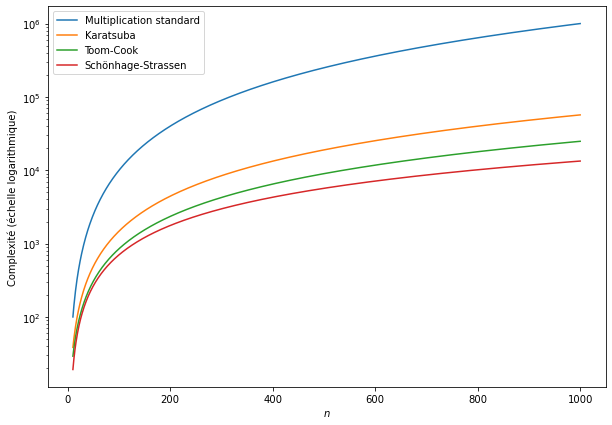

In [172]:
n = np.arange(10,1001)
stand = np.power(n,2)
kara = np.power(n,np.log(3)/np.log(2))
toom = np.power(n,np.log(5)/np.log(3))
schstr = n * np.log(n) * np.log(np.log(n))

plt.figure(figsize=(10,7))
plt.semilogy(n,stand,label="Multiplication standard")
plt.semilogy(n,kara,label="Karatsuba")
plt.semilogy(n,toom,label="Toom-Cook")
plt.semilogy(n,schstr,label="Schönhage-Strassen")
plt.xlabel("$n$")
plt.ylabel("Complexité (échelle logarithmique)")
plt.legend()
plt.savefig("comp.png")
plt.show()